#  Анализ номинативных данных

In [1]:
from IPython.display import Image

In [2]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import pandas as pd

import numpy as np
import random
random.seed(9001)

In [4]:
from itertools import combinations
import math

In [5]:
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning">
<h2> Постановка задачи </h2>

</div>

 - если две перенные количественные: корреляция, регрессия
 - если одна номинативная, а другая колличесвенная: то есть при сравнии групп разумно использовать t-тест и дисперсионный анализ

Для номинальной переменной строим распределение сколько раз встречалась та или иная градачия номинативной перменнйо

In [6]:
x = np.random.randint(1, 60, size=(60))
y = [random.choice(['A', 'B', 'C']) for i in range(60)]
df = pd.DataFrame({'x': x, 'y': y})

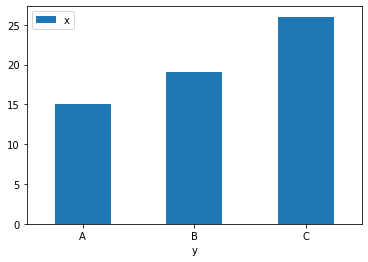

In [7]:
df.pivot_table(index ='y', values = 'x', aggfunc = 'count') \
  .reset_index().plot(kind = 'bar', x = 'y')
plt.xticks(rotation = 0)
plt.show()

**Гитотеза:** импирическое распределение частот в выборки отличается от некоторого заданного РАВНОМЕРНОГО

<div class="alert alert-warning">
<h2> Расстояние Пирсона </h2>

</div>

[Статья](http://bioinformatics.ru/Data-Analysis/Pearson_chisquare_distance.html)

H0: Распределение частот не отличимо от ожидаемого

H1: Распределение частот отличимо от ожидаемого

Задача: Определить, насколько статистически значимы различия между ожидаемыми и эмпирическими значениями


Расстояние Хи-квадрат:

$$χ² ={(\frac{∑(O_i - E_i)}{\sqrt{(E_i}})^{2}} = \frac{∑(O_i - E_i)^{2}}{E_i}$$

нормируем на корень так как пирсон доказал, что при верной нулевой гитотезе флуктуация наблюдаемого знаечния относительно ожидаемого значения частоты пропорциональна квадрату 

где  значения $O_i$ (Observed) - наблюдаемые частоты, $E_i$ (Expexted) - ожидаемые частоты.

**Проверка монетки на четность:**
 - нулевая гипотеза вероятности раные 0.5
 - прейти к оценке частоты номинативной перемнной

In [8]:
eagle = 40 
tails = 20
N = eagle + tails

In [9]:
E_eagle = 30
E_tails = 30

In [10]:
print('как ожидаемые значения отклонятся от наблюдаемых {}'.format((20 - 30)**2 /30+ (40 - 30)**2 /30))

как ожидаемые значения отклонятся от наблюдаемых 6.666666666666667


In [11]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([40, 20], f_exp=[30, 30]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.6f}')
if chi2_pvalue > 0.05:
    print('принять нулевую гипотезу')
else:
    print('отвергунть нулевую гипотезу')

Хи-квадрат = 6.67, p = 0.009823
отвергунть нулевую гипотезу


In [12]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([1500*.53, 1500*(1-.53)], f_exp=[1500/2, 1500/2]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.6f}')
if chi2_pvalue > 0.05:
    print('принять нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу (Принимаем альтернативную гипотезу, что распределение отличается от равномерного.)')

Хи-квадрат = 5.40, p = 0.020137
Отвергаем нулевую гипотезу (Принимаем альтернативную гипотезу, что распределение отличается от равномерного.)


При 100 бросаниях монеты число гербов равно O1= 65, а решек O2= 35. Если монета симметрична, то ожидаемые частоты E1=50, E2=50

In [13]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([10, 30, 50], f_exp=[30, 30, 30]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.3f}')

Хи-квадрат = 26.67, p = 0.000


In [14]:
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

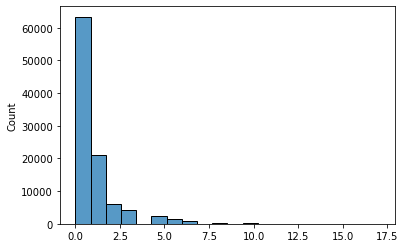

In [15]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(100000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())
import seaborn as sns

sns.histplot(list_of_chi_square, bins = 20);

In [16]:
# посмотрим еще раз на значение, которое мы получали в нашем 
# конкретном наблюдении с выпаданием орла и решки (когда получили 40 орлов!):
exp_eagles = 40
exp_tails = 20
# расчитываем расстояние хи-квадрат Пирсона: 
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30

In [17]:
# посмотрим % значений с равным или большим значением нашего конкретного наблюдения:
count_of_result_or_more_like_we_see = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2:
        count_of_result_or_more_like_we_see += 1;
print(count_of_result_or_more_like_we_see)

1337


In [18]:
# % вероятности получить такие расхождения
print('Или с вероятность {:.3f} мы могли получить такое (40 раз!) \
        \nвыпадение орла при 60-ти подбрасываниях честной монеты'.format(count_of_result_or_more_like_we_see / len(list_of_chi_square)))

Или с вероятность 0.013 мы могли получить такое (40 раз!)         
выпадение орла при 60-ти подбрасываниях честной монеты


In [19]:
#from scipy import stats
chi2_down=stats.chi2.cdf(2 , 2) # - (нижняя граница диапазона, число степеней свободы)
chi2_up=stats.chi2.cdf(4 , 2) # - (верхняя граница диапазона, число степеней свободы)
# stats.chi2.cdf() - вероятность попасть в 95%, т.е. значение, обратное p-value (= 1 - p-value)

chi2_interval = chi2_up - chi2_down
print(f'В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит {chi2_interval:.1%} наблюдений.')

В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит 23.3% наблюдений.


In [20]:
def checking_probability(df, low_bound, high_bound = None, status = None):
    if high_bound is None:
        if status == 'upper':
            return 1 - stats.chi2.cdf(low_bound , df)
        elif status == 'both':
            return
    else:
        return stats.chi2.cdf(high_bound , df) - stats.chi2.cdf(low_bound , df)

In [21]:
# вероятность получить такое и еще большое отклонение в случае сли верна нулевая гипотеза
# с числом степенями свободы 1 и значением хи -квадрат 6.7
# так как р меньше 0.05 отклоняем нулевую гипотезу
# следовательно обнаружены статистически значимые различия
checking_probability(df = 1, low_bound = 6.7, status = 'upper')

0.009641291128497542

In [22]:
checking_probability(df= 2, high_bound = 4, low_bound = 2)

0.23254415793482963

<div class="alert alert-warning">
<h2> Распределение Хи-квадрат Пирсона </h2>

</div>

Распределение хи-квадрат с k-степенями свободы - это распределение суммы квадратов k независимых стандартных нормальных величин

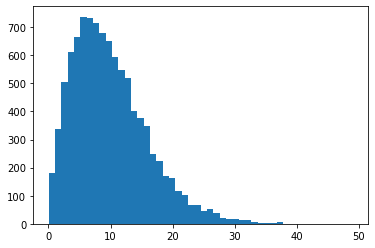

In [23]:
plt.hist(np.array([random.normalvariate(2, 1)**2 + random.normalvariate(2, 1)**2  for i in range(10000)]), bins=48)
plt.show()

Количество степеней свободы = количество переменных -1.

In [24]:
# Критическое значение для Хи квадрата для p-value 0.05
from scipy.stats.distributions import chi2
chi2.ppf(df=2, q=0.95)

5.991464547107979

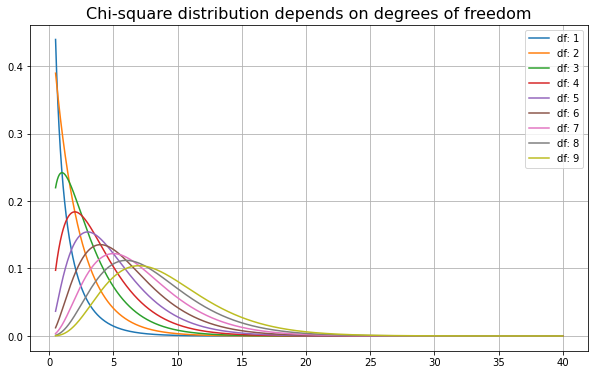

In [25]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0.5, 40, 0.001)
plt.figure(figsize=(10, 6))
#define multiple Chi-square distributions
for i in range(1, 10):
    plt.plot(x, chi2.pdf(x, df=i), label='df: ' + str(i))
#add legend to plot
plt.legend()
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

In [26]:
def distance_chi_square_from_toss_coin2( number_of_coin_flips ):
    eagles = 0
    # подбрасываем монету 60 раз
    for i in range(number_of_coin_flips):
        if random.randint(0,1) == 1:
            eagles += 1
    tails = number_of_coin_flips - eagles
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    ones = number_of_coin_flips/2
    return (eagles-ones)/ones**0.5,  (tails-ones)/ones**0.5


In [27]:
def plotting():
    box = []
    for i in list(map(distance_chi_square_from_toss_coin2, [random.randint(10, 100) for i in range(2000)])):
        box.append([i[0], i[1]])
    data = pd.DataFrame(box, columns = ['eagles','tails' ])
    graph= sns.scatterplot(x = 'eagles', y = 'tails', data =data)
    graph.plot([2, 2], [-2, 2], color = 'r')
    graph.plot([-2, -2], [-2, 2], color = 'r')
    graph.plot([2, -2], [2, 2], color = 'r')
    graph.plot([-2, 2], [-2, -2], color = 'r')

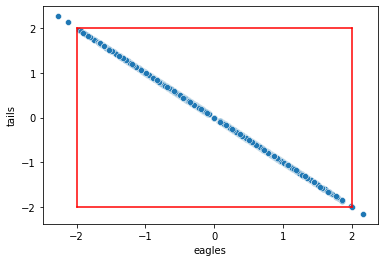

In [28]:
plotting()

In [29]:
box = []
for i in list(map(distance_chi_square_from_toss_coin2, [random.randint(10, 100) for i in range(200)])):
        box.append([i[0], i[1]])
data = pd.DataFrame(box, columns = ['eagles','tails' ])
data['summa'] = data.apply(lambda x: x['eagles']**2 +x['eagles']**2  
                            , axis = 1)

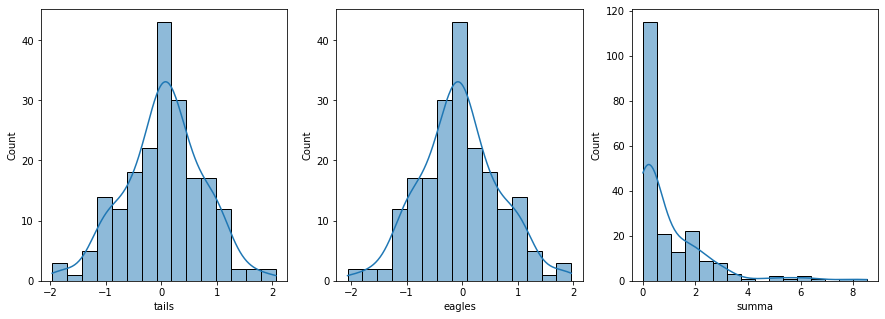

In [30]:
f, axs = plt.subplots(1,3,figsize=(15,5))
for i, dais in enumerate(['tails', 'eagles', 'summa']):
    sns.histplot(data[dais], kde = True, ax = axs[i])

In [31]:
from scipy.stats import shapiro

def shapiro_(y):
    stat, p = shapiro(y)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [32]:
data

,eagles,tails,summa
0,1.000000,-1.000000,2.000000
1,1.220529,-1.220529,2.979381
2,-0.919145,0.919145,1.689655
3,-0.271607,0.271607,0.147541
4,-0.353553,0.353553,0.250000
...,...,...,...
195,0.486664,-0.486664,0.473684
196,0.000000,0.000000,0.000000
197,0.000000,0.000000,0.000000
198,0.000000,0.000000,0.000000


In [33]:
shapiro_(data['tails'])

Statistics=0.993, p=0.498
Sample looks Gaussian (fail to reject H0)


In [34]:
shapiro_(data['eagles'])

Statistics=0.993, p=0.498
Sample looks Gaussian (fail to reject H0)


In [35]:
'''
Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. 
Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 1510,10,10,5,10,15 
'''

'\nТеперь рассчитаем p-уровень значимости для нашего примера с игральной костью. \nНапомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):\n\n10, 10, 10, 5, 10, 1510,10,10,5,10,15 \n'

In [36]:
# расстояние хи-квадрат для представленных наблюдений:
observations = [10, 10, 10, 5, 10, 15]
exp = sum(observations) / len(observations)
cal_chi2 = 0
for obs in observations:
    cal_chi2 += (obs-exp)**2/exp
print(cal_chi2)

5.0


In [37]:
# Найдем приближенное распределения хи-квадрат для игральной кости:
list_of_chi2_cdf = []
for i in range(10000):
    # кол-во выпадений каждой грани в наших подбрасываниях
    res = {}
    for j in range(60):
        x = np.random.choice([1,2,3,4,5,6])
        res[x] = res.get(x, 0) + 1
    list_of_chi2_cdf.append(sum([(value-exp)**2/exp for value in res.values()]))

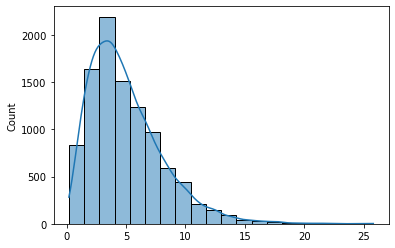

In [38]:
sns.histplot(list_of_chi2_cdf, kde=True, bins=20);

In [39]:
# надем сколько точек больше чем 
p_count = sum(1 for i in list_of_chi2_cdf if i >= cal_chi2)
print(f'{p_count=}, {p_count/10000}')

p_count=4293, 0.4293


In [40]:
# реализация в пакете 
stats.chisquare([10, 10, 10, 5, 10, 15])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

<div class="alert alert-warning">
<h2> Анализ таблиц сопряженности </h2>

</div>

Задача: Исследование наличия взаимосвязи между двумя номинативными переменными

H0: Распределение частот не отличимо от ожидаемого

H1: Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой

`Минимальное кол-во наблюдений в каждой из ячеек должно быть больше 5`

`Все наблюдения независимы`

Для поиска взаимосвязи между номинативными переменными, применяем критерий $χ²$-Пирсона, который проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого. 

И рассчитываем p-value со степенями свобод, равными:
$$df = (n - 1) * (m - 1)$$
где $n$ - количество столбцов таблицы, $m$ - количество строк

**Формула для расчета ожидаемых частот** $$f_{ij}= \frac{f_i*f_j}{N}$$


В теории распределение $χ²$ непрерывно, тогда как вычисляемые значения всегда дискретны, в результате H0 может отвергаться слишком часто. Чтобы скорректировать значение p-уровня значимости применяется Поправка Йетса на непрерывность. (Используется для анализа таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10).

$$χ²_{Yates} = \frac{∑ (|f_O - f_E| - 0.5)² }{f_E}$$
где $f_O$ - эмпирическое значение в ячейке, $f_E$ - ожидаемое значение в ячейке



In [41]:
def check_chi(chi2_pvalue):
    if chi2_pvalue > 0.05:
        print('Принять нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого')
    else:
        print('Отвергунть нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого')

In [42]:
#from scipy import stats
observed_array = [ [18, 7], [6, 13] ]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно
# удалить из формулы и ничего не изменится
check_chi(p_value) 
print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')
print(f'\nОжидаемые значения:\n{expected_array}')

Отвергунть нулевую гипотезу, о том, что распределение частот не отличимо от ожидаемого
Хи-квадрат = 7.114 
p-value = 0.008 
df = 1

Ожидаемые значения:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


In [43]:
from statsmodels.graphics.mosaicplot import mosaic

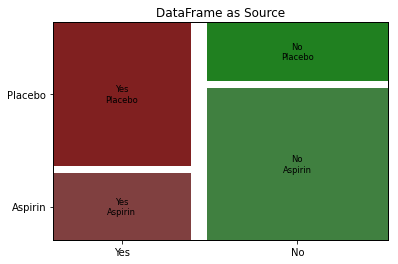

In [44]:
Aspirin = ['Yes'] *6 + ['No'] *18
Placebo = ['Yes'] *13 + ['No'] *7
data = pd.concat([pd.DataFrame({'way': Aspirin, 'name': 'Aspirin'}),
                     pd.DataFrame({'way': Placebo, 'name': 'Placebo'})])
def resid_pearson(x):
    dif_matrix = observed_array - expected_array
    if x['way'] == 'No' and x['name'] == 'Aspirin':
        return dif_matrix[0][0] / np.sqrt(expected_array[0][0])
    elif x['way'] == 'No' and x['name'] == 'Placebo':
        return dif_matrix[0][1]/ np.sqrt(expected_array[0][1])
    elif x['way'] == 'Yes' and x['name'] == 'Aspirin':
        return dif_matrix[1][0]/ np.sqrt(expected_array[1][0])
    else:
        return dif_matrix[1][1]/ np.sqrt(expected_array[1][1])
        

data['residuals'] = data.apply(lambda x: resid_pearson(x), axis =1)
mosaic(data[['way', 'name']], ['way', 'name'], title='DataFrame as Source', gap=0.05)
plt.show()

In [45]:
# встроенная функция для остатков
F = np.array([[18, 7], [6, 13]])                                     
table = sm.stats.Table(F)                                                                            
table.resid_pearson  # Pearson's residuals

array([[ 1.18167831, -1.29446374],
       [-1.35547799,  1.48485174]])

In [46]:
# встроенная функция для остатков
table.standardized_resids  # Standardized residuals

array([[ 2.66722801, -2.66722801],
       [-2.66722801,  2.66722801]])

In [47]:
# пример реализации с цветами
from itertools import product
tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)

In [48]:
# Импорт необходимых модулей

import matplotlib.patches as mpatches


def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = stats.chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 7).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

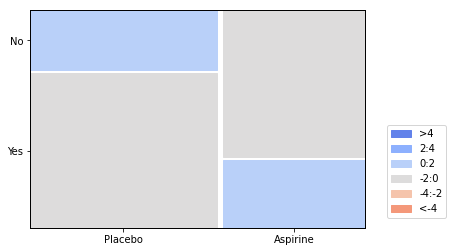

In [49]:
make_me_plot(data)

Стандартизированный остаток St.res равен отношению остатка (разности наблюдаемого и ожидаемого) к среднеквадратичному отклонению. Если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.


<div class="alert alert-warning">
<h2> Точный критерий Фишера </h2>

</div>

- При анализе четырехпольных таблиц ожидаемые значения в каждой из ячеек должны быть не менее 10. В том случае, если хотя бы в одной ячейке ожидаемое явление принимает значение от 5 до 9, критерий хи-квадрат должен рассчитываться с поправкой Йейтса. 
- Если хотя бы в одной ячейке ожидаемое явление меньше 5, то для анализа должен использоваться точный критерий Фишера.
- В случае анализа многопольных таблиц ожидаемое число наблюдений не должно принимать значения менее 5 более чем в 20% ячеек.

In [50]:
#from scipy import stats
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(p_value)

0.48571428571428527


In [51]:
# пример реализации
def C(n, k):
     return math.factorial(n) / (math.factorial(k) * math.factorial(n - k ))

def p(a, b, c, d):
    n = a + b + c + d
    numerator = math.factorial(a + b) * math.factorial(c + d)* math.factorial(a + c)* math.factorial(b+ d)
    denominator = math.factorial(a)*math.factorial(b)*math.factorial(c)*math.factorial(d)*math.factorial(n)
    
    return numerator/denominator

(p(1, 3, 3, 1)+p(4, 0, 0, 4))*2

0.4857142857142857

#  Логистическая регрессия

<div class="alert alert-warning">
<h2> Логистическая регрессия. Постановка задачи. </h2>

</div>

Логистическая регрессия используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).
Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

Odds (шансы)$ = \frac{p}{1 - p}$ - это отношение вероятности успеха (p) к вероятности неудачи (1 - p) , ∈ [0; +∞)

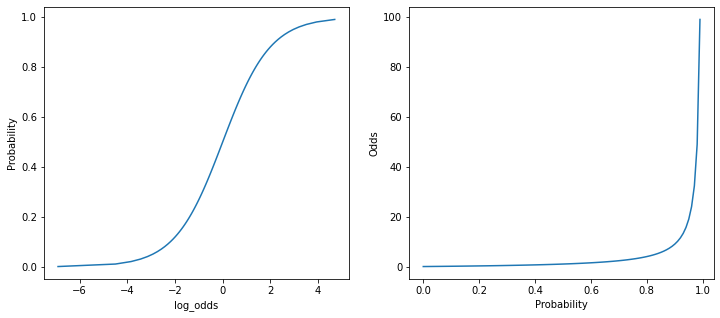

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.lineplot(y = [i for i in np.arange(0.001, 1, 0.01)],
         x = [np.log(i/(1 - i)) for i in np.arange(0.001, 1, 0.01)] , ax = axes[0])
axes[0].set_xlabel('log_odds')
axes[0].set_ylabel('Probability')

sns.lineplot(x = [i for i in np.arange(0, 1, 0.01)],
         y = [i/(1 - i) for i in np.arange(0, 1, 0.01)] , ax = axes[1])
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Odds')
plt.show()

Если извлечь логарифм из числа меньше 1, то получим отрицательное значение. Значит если шанс меньше 1, то и вероятность меньше 0.5

In [53]:
# Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:
math.exp(-1) / (1 + math.exp(-1))

0.2689414213699951

вероятность = exp(регрессия) / (1 + exp(регрессия))

шанс = вероятность / (1 - вероятность)

<div class="alert alert-warning">
<h2> Модель без предикторов. Intercept only model </h2>

</div>

**Intercept** - натуральный логарифм шансов положительного исхода (все положительные делятся на все отрицательные исходы). И свободный член логистической регресии.

 $$intercept = ln\frac{p}{1-p} $$
 Т.е. Логарифм шанса положительного исхода


H0: Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:

In [54]:
dataset = pd.read_csv('titanik_full_data.csv', sep = '\t')
dataset['intercept'] = 1
# dict ={'male':0, "female":1}
# dataset['Sex']= dataset['Sex'].map(dict)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,intercept
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [55]:
# первый вараинт реализации через Logit Regression Results

In [56]:
logit_model = sm.Logit(dataset['Survived'].values, dataset['intercept'].values).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.662771
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1308
Method:                           MLE   Df Model:                            0
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:               1.350e-10
Time:                        13:37:03   Log-Likelihood:                -867.57
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5007      0.057     -8.780      0.000      -0.612      -0.389


- Estimate - значение intercept (логарифма шансов)
- std.Error - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0
- z-value =  $\frac{intercept}{std.Error}$ – расстояние до 0 в стандартных отклонениях.
- Pr(>|z|) - значение p-value, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза
1
'''

P < 0.05 для свободного члена логистической регрессии означает, что:
 - Распределение исходов в нашей выборке значимо отличается от равномерного
 - Вероятности двух исходов зависимой переменной значимо различаются между собой

In [57]:
# второй вараинт реализации через биномиальная регрессия

In [58]:
logit_res = smf.glm('Survived ~ 1', dataset, family = sm.families.Binomial()).fit()
print(logit_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1308
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -867.57
Date:                Thu, 05 Aug 2021   Deviance:                       1735.1
Time:                        13:37:03   Pearson chi2:                 1.31e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5007      0.057     -8.780      0.0

In [59]:
print(f'то есть вероятность выжить случайного человека в этой модели {math.exp( -0.5007)}')

то есть вероятность выжить случайного человека в этой модели 0.6061062368161789


In [60]:
# Значение интерсепта можно получить, если найти шанс выживания и вычислить из него логарифм
dataset['Survived'].value_counts()
math.log(494/(815))

-0.5006525960529401

In [61]:
'''
С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что \
сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. \
Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член \
нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?
Введите численный ответ

'''


# расчет шансов
math.exp( -0.8472979)

# расчет вероятности
math.exp(-0.8472979)/(1+math.exp(-0.8472979))*50

14.999999584065643

<div class="alert alert-warning">
<h2> Модель с одним номинативным предиктором </h2>

</div>

In [62]:
logit_res2 = smf.glm('Survived ~ Sex', dataset, family = sm.families.Binomial()).fit()
print(logit_res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1307
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -539.84
Date:                Thu, 05 Aug 2021   Deviance:                       1079.7
Time:                        13:37:03   Pearson chi2:                 1.31e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5588      0.122     12.752      

Смотрим какой градачии фактора предиктора нет среди коэфициентов, чтобы интерпретировать на основании этого intercept

Intercept - натуральный логарифм шансов положительного исхода для женшин 

Коэффициент при SexMale - логарифм отношения шансов положительного исхода для мужчие деленного на шансы положительного исходя для женщин ( так как коэффициент мужчина вероятность выжить у него сильно снижается)

In [63]:
dataset.pivot_table(index = 'Survived',columns = 'Sex', aggfunc = {'PassengerId':'count'}) \
       .reset_index()

Survived PassengerId     
Sex               female male
0          0          81  734
1          1         385  109

In [64]:
# интерсепт - это шанс выжить для женщин
np.log(385/81)

1.5587941796153455

In [65]:
# Sex[T.male] - это отношение шансов выжить у мужчин к жансам выжить у женщин
# Intercept + SexMale = log(odds_male)
# SexMale = log(odds_male) - Intercept = log(odds_male) - log(odds_female) = log(odds_male / odds_female)
np.log((109/734) /(385/81))

-3.465955326000717

Т.к. переменные Female и Male зависимы друг от друга (мультиколлинеарны), разумно в построении модели использовать только одну из них (любую, у нас выбраны женщины, просто по алфавиту), а вторую назначить значением intercept. Поэтому, смотрим, какой градации-предиктора нет среди коэффициентов, это и будет intercept

Еще раз: это эффект из-за полной мультиколиарности, так как всегда 0 + 1 = 1

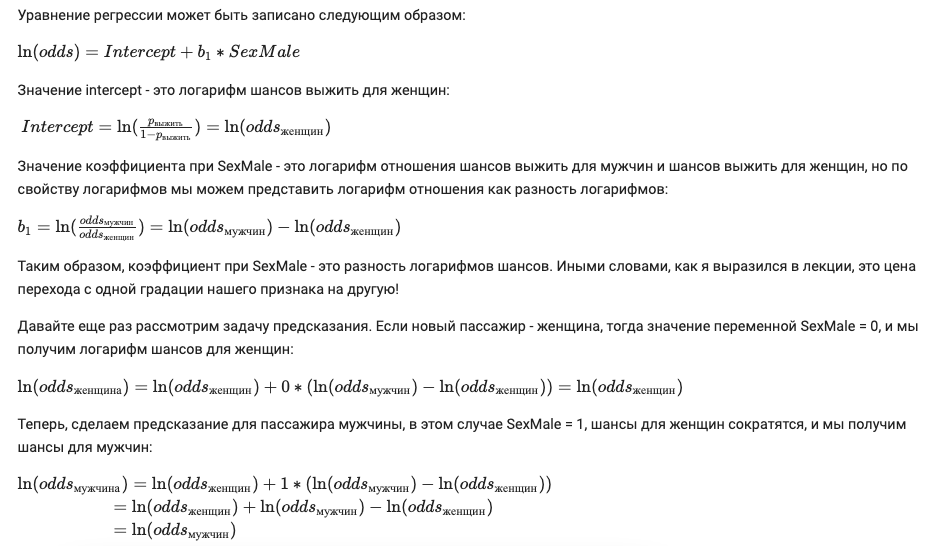

In [66]:
Image(filename='фото//output12.png')

In [67]:
def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [68]:
# Using function defined in answer:
F, p = calculate_nested_f_statistic(logit_res, logit_res2)
# (9.519052917304652, 0.004914748992474178)

In [69]:
print('Принимаем H0, так как не получили значимых отклонений и  p>0.05' \
          if p>0.05 else 'Оклоняем H0, так как получили значимые отклонения и  p<0.05')

Оклоняем H0, так как получили значимые отклонения и  p<0.05


<div class="alert alert-warning">
<h2> Модель с двумя номинативными предикторами </h2>

</div>


In [70]:
dict ={1:'first', 2:'second', 3:'third'}
dataset['Pclass']= dataset['Pclass'].map(dict)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,intercept
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [71]:
multi_res = smf.mnlogit('Survived ~ Sex * Pclass', dataset).fit_regularized()
print(multi_res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3717179909325608
            Iterations: 54
            Function evaluations: 54
            Gradient evaluations: 54
                          MNLogit Regression Results                          
Dep. Variable:               Survived   No. Observations:                 1309
Model:                        MNLogit   Df Residuals:                     1303
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.4391
Time:                        13:37:03   Log-Likelihood:                -486.58
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                1.943e-162
                  Survived=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

- Intercept- логарифм шансов положительного исхода для женщин в первом классе.
- Sex[T.male] — логарифм отношения шансов для женщин в первом классе и мужчин в первом классе.
- Pclass[T.second] — логарифм отношения шансов для женщин в первом и во втором классе.
- Pclass[T.third] — логарифм отношения шансов для женщин в первом и в третьем классе.
- Sex[T.male]:Pclass[T.second] — разность логарифмов отношения шансов, рассчитанного для мужчин и женщин  во втором классе и в первом классе.
- Sex[T.male]:Pclass[T.third] — разность логарифмов отношения шансов рассчитанного для мужчин и женщин в третьем классе во втором.

In [72]:
# Sex[T.male]:Pclass[T.second] = 
# log( шансы мужчин во втором классе / шансы женщин в втором классе ) минус
# log( шансы мужчин в первом классе / шансы женщин в перовом классе )

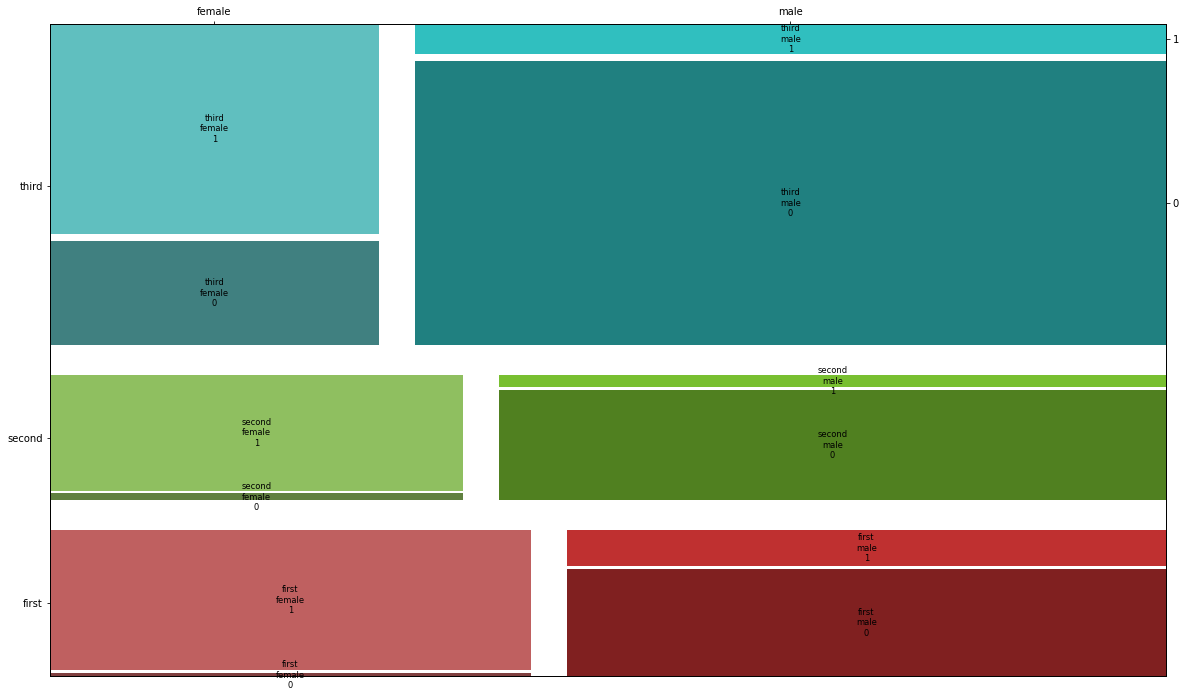

In [73]:
data  = dataset.pivot_table(index = ['Pclass',  'Sex', 'Survived'], aggfunc = {'PassengerId': 'count'}).reset_index()
dic = {}
for i, j in data.iterrows():
    dic[(j[0], j[1], j[2])]=j[3]
fig, ax = plt.subplots(1, 1, figsize=(20,12)) 
mosaic(dic, horizontal=0, gap=.05, axes_label=2,  label_rotation=0, ax= ax)
plt.show()

In [74]:
logit_res = smf.glm('Survived ~ Pclass + Sex + Age', dataset, family = sm.families.Binomial()).fit()
print(logit_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Thu, 05 Aug 2021   Deviance:                       796.42
Time:                        13:37:03   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9568      0.372  

`Intercept` - шансы выжить (логарифмические) для женщины в первом классе, которой 0 лет. 

- Все коэффициенты значимы (`P>|z|` меньше 0.05)
- Шансы выжить во втором классе ниже, чем в первом, а в третьем ещё ниже
- Быть мужчиной на Титанике ещё хуже
- А также плохо быть старше на Титанике

При единичном повышении возроста, то логарифм шасов понижается на  -0.0313 

<div class="alert alert-warning">
<h2> Когда нужно использовать непараметрические методы и почему? </h2>

</div>


$$ t = \frac{\hat{x_1}-\hat{x_2}}{\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}}$$

**Основные требования к данным**
- Независимость каждого из наблюдений.
- Гомогенность дисперсий (В ПРОТИВНОМ СЛУЧАЕ тест для неравных дисперсий).
- Нормальное распределение исследуемого признака в генеральной совокупности.
- При маленьком объеме выборки мощностЬ теста невелика.


In [75]:
def p_value_t_one_sample(t_stat, n, alternative = 'two-sided'):
    from scipy import stats
    df = n - 1
    if alternative == 'two-sided':
        p = 2 * (stats.t.sf(abs(t_stat), df))
    elif alternative == 'greater':
        p = stats.t.sf(t_stat, df)
    elif alternative == 'less':
        p = stats.t.cdf(t_stat, df)
    return p

if p_value_t_one_sample(t_stat = 3.14, n = 40,  alternative = 'two-sided') > 0.05:
    print('Принять нулевую гипотезу о равенсве средних')
else:
    print('Oтвергнуть нулевую гипотезу о равенсве средних')

Oтвергнуть нулевую гипотезу о равенсве средних


In [76]:
# как работатет QQ-plot
# Предположим что признак распредлен нормально в ГС
# Случайным образом извлечем и упорядочим 3 элемента

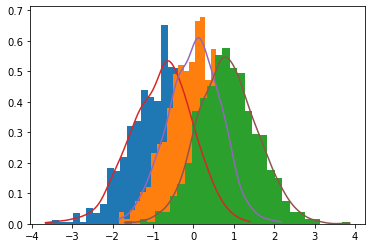

In [77]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt



def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''
    density = ss.gaussian_kde(dataset)
    '''
        covariance_factor вычисляет коэффициент (kde.factor), который умножает ковариационную матрицу данных для получения ковариационной матрицы ядра.
    '''
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()
    min_x, max_x = np.percentile(dataset, [0, 100])
    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (sorted(np.random.choice(rnd, 3)) for i in range(1000))

# распаковываем
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
plt.hist(rnd1, 30, density=True, histtype='barstacked')
plt.hist(rnd2, 30, density=True, histtype='barstacked')
plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

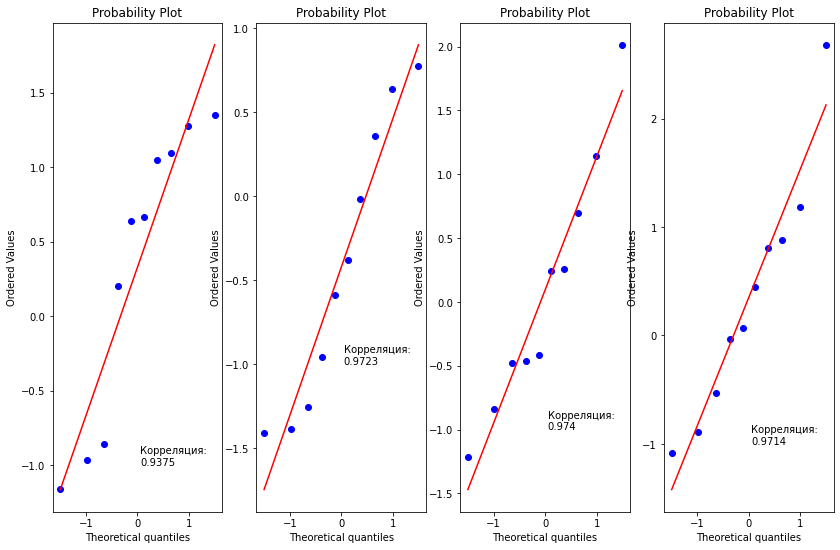

In [78]:

from scipy.stats import linregress
# выбираем 4 выборки по 4 занчений и теоретические и практические квантили
fig, ax = plt.subplots(1, 4,figsize=(14, 9) )
for i, j in enumerate((sorted(np.random.choice(rnd, 10)) for i in range(4))):
    stats.probplot(j, dist="norm", plot=ax[i])
    a = stats.probplot(j, dist="norm")[0][0]
    b = stats.probplot(j, dist="norm")[0][1]
    ax[i].text(0.05, -1, 'Корреляция:\n'+ str(round(linregress(a, b)[2], 4)))

В силу большой мощности на большой выбоке тест Шапиро -Уилка будет **может показывать отклонение от нормального распредления**.

Нам важно не само отклонение от нормального распределения, а то как сильно оно отклоняется от нормально! Если корреляция на графике qqplot превышает 0,95 - это допустимое отклонение реальных данных от идеальных

**`U-критерий Манна-Уитни`**

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

 Затем для каждой из выборок рассчитывается показатель:

$$U_{1} = R_{1} - \frac{n_{1}*(n_{1}+1)}{2}$$
$$U_{2} = R_{2} - \frac{n_{2}*(n_{2}+1)}{2}$$

Где $R_{1}$, $R_{2}$ - это сумма рангов в двух группах, а $n_{1},n_{2}$ - число наблюдений.

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где 

$$\mu=\frac{n_{1}*n_{2}}{2}$$

$$\sigma=\sqrt{\frac{n_{1}*n_{2}*(n_{1}+n_{2}+1)}{12} }$$

  

что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

**Разумно применять вместо t - теста:**

- Распределения хотя бы в одной из выборок значительно отличается от нормального. 
- Есть заметные выбросы в данных. 
- В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении). 
**Неразумно применять:**
- Выборки разного размера, с различным направлением асимметрии.  

**`Критерий Краскела-Уоллиса`**

Если при сравнении трёх и более групп нарушаются требования и к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса.

Основная статистика критерия  Краскела-Уоллиса - это дисперсия средних значений равнгов в равниваемых группах. При верности нулеврой гипотезы распределенеи этой статистики моэжно описать при помощи распределения хи-вадрат

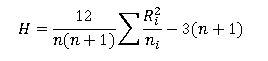

In [79]:
from PIL import Image
from urllib.request import urlopen
url = 'http://statistica.ru/upload/medialibrary/394/H.png'
image = Image.open(urlopen(url))
image

**Разумно применять критерий Краскела-Уолиса:**
- В сравниваемых группах распредление выборок значительно отличается от нормального, а также нарушается преположение о гомогенности дисперсий

In [80]:
'''
    Null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA
'''

'\n    Null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA\n'

In [81]:
x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10]
stats.kruskal(x, y)

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)

С увеличением объёма выборки и при прочих равных вероятность того, что p-значение при проверке на нормальность распределения окажется меньше 0,05: ПОВЫШАЕТСЯ

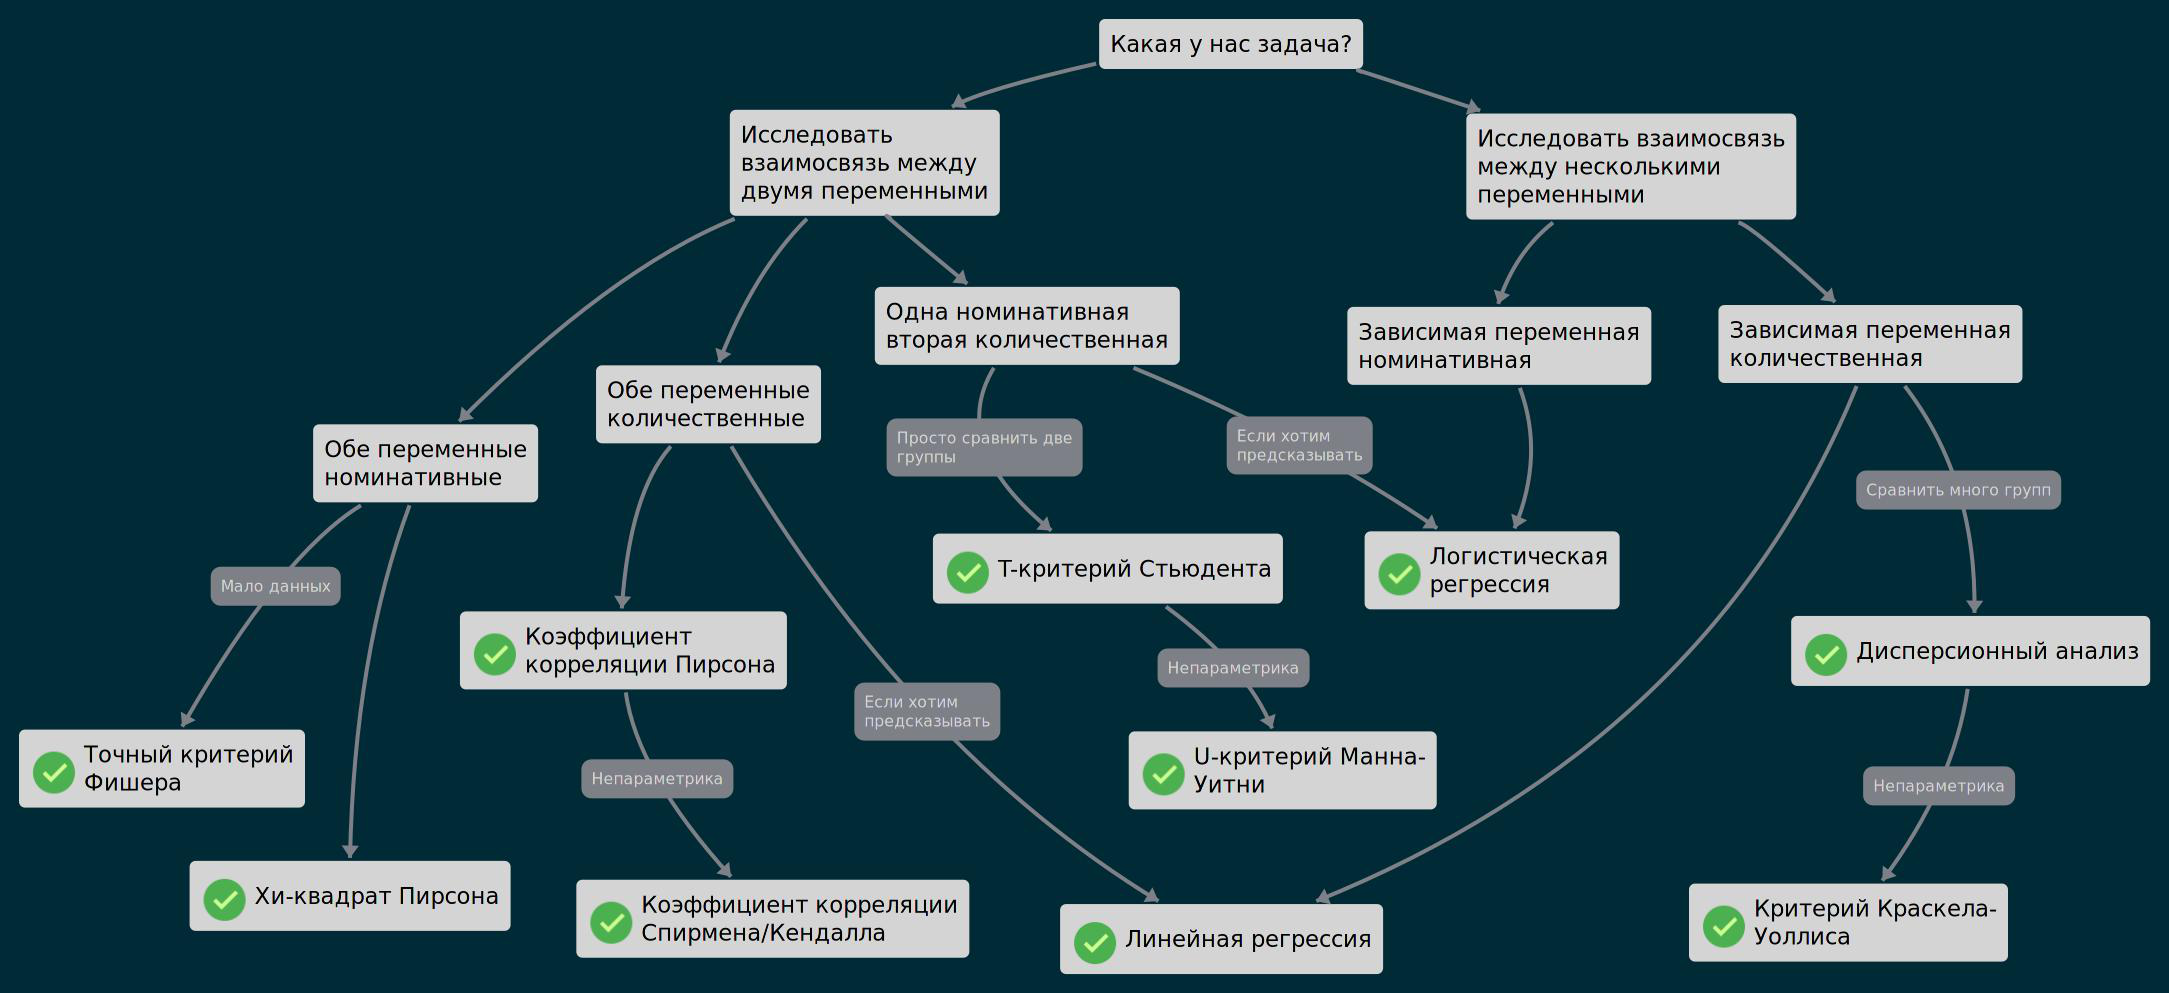

In [82]:
from PIL import Image
from urllib.request import urlopen
url = 'https://ucarecdn.com/1f8e468c-3c7a-4a03-a231-681752080368/'
image = Image.open(urlopen(url))
image

### Задча1

In [83]:
import re
import statsmodels.formula.api as sf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_passangers.csv')
data_for_predict = pd.read_csv(r'https://stepic.org/media/attachments/course/524/predict_passangers.csv')
data.is_prohibited = data.is_prohibited.map({'Yes' : 1, 'No' : 0})

def get_regression_model(data):
    # Меняем значения зависимой переменной на 1 / 0
    
    # ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
    model = sf.glm('is_prohibited ~ type + weight + length + width', data, family = sm.families.Binomial()).fit()
    coef = model.params
    logit_res = model.summary()
    coef_names = np.array([str(logit_res.tables[1][i][0]) for i in range(1, 6)])
    p_values = np.array([float(str(logit_res.tables[1][i][4])) for i in range(1, 6)])
    regression_model = pd.DataFrame(data={
        'coef_names' : coef_names,
        'coef' : coef,
        'p_values' : p_values
    })
    return regression_model

def most_suspicious(test_data, data_for_predict):
    model = get_regression_model(test_data)
    data_for_predict['is_Suitcase'] = data_for_predict['type'].map({'Suitcase' : 1, 'Bag' : 0})
    # Находим logit = ß0 + ß1*x1 + ß2*x2 + ...
    logit = \
        model.coef[model.coef_names == r'Intercept'].values[0] + \
        model.coef[model.coef_names == r'type[T.Suitcase]'].values[0] * data_for_predict['is_Suitcase'] + \
        model.coef[model.coef_names == r'weight'].values[0] * data_for_predict['weight'] + \
        model.coef[model.coef_names == r'length'].values[0] * data_for_predict['length'] + \
        model.coef[model.coef_names == r'width'].values[0] * data_for_predict['width']
    # Вероятность p = exp(logit) / (1 + exp(logit))
    data_for_predict['probability'] = np.exp(logit) / (1 + np.exp(logit))
    # Возвращаем имя пассажира(или пассажиров) с самой высокой вероятностью запрещенного багажа
    return list(data_for_predict['passangers'][data_for_predict['probability'] == data_for_predict['probability'].max()].values)
    
most_suspicious(data, data_for_predict)

['Svetozar']

In [84]:
data= pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")

In [85]:
def norm_test(df):
    df["yz"] = df["y"].astype("str") + df["z"].astype("str") 
    df["count"] = df.groupby("yz").cumcount()
    df = df.pivot(columns="yz", values="x", index="count")
    # easier with numpy
    arr = np.array(df)
    result = {}
    for column, group in zip(arr.T, df.columns):
        # for correct shapito test have to remove None values from pivoting
        shapiro_res = shapiro(column[~np.isnan(column)])[1]
        result[group] = [shapiro_res,
                        'данные нормальные' if shapiro_res > 0.05 else 'данные не нормальные']
        
    return pd.DataFrame.from_dict(result,orient='index' )

In [86]:
norm_test(data)

,0,1
02,0.219766,данные нормальные
03,0.623818,данные нормальные
12,0.196036,данные нормальные
13,0.047823,данные не нормальные


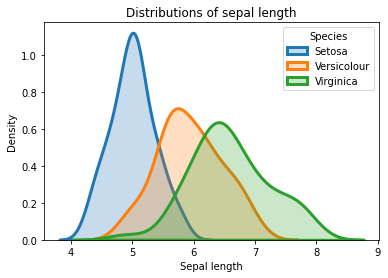

In [87]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :1]  # sepal length
y = iris.target
labels = ["Setosa", "Versicolour", "Virginica"]

for i in range(3):
    sns.distplot(X[y==i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species");

### Задча2

In [88]:
'''
Напишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, 
переменная y - фактор, ﻿разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы 
при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя ﻿бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи 
критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.
'''

'\nНапишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, \nпеременная y - фактор, \ufeffразбивает наблюдения на три группы.\n\nЕсли распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы \nпри помощи дисперсионного анализа и вернуть \ufeffименованный вектор со значением p-value, имя элемента — "ANOVA".\n\nЕсли хотя \ufeffбы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи \nкритерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".\n\nРаспределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.\n\nДисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.\n'

In [89]:
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def smart_anova(data):
    group_names = data['y'].unique()
    all_samples = [data.x[data.y == group_name] for group_name in group_names]
    # если дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса
    t_statistic, p_bartlett = bartlett(*all_samples)
    if p_bartlett < 0.05:
        return {'KW' : kruskal(*all_samples).pvalue}
    # Если хотя бы в одной группе распределение отличается от нормального - критерий Краскела — Уоллиса
    # для каждой выборки отдельно находим p_value
    p_shapiro_values = [shapiro(data.x[data.y == group_name].values).pvalue for group_name in group_names]
    for p in p_shapiro_values:
        if p < 0.05:
            return {'KW' : kruskal(*all_samples).pvalue}
    # ИНАЧЕ - при помощи дисперсионного анализа One-way ANOVA
    return {'ANOVA' : [f_oneway(*all_samples).pvalue]}

smart_anova(data)

{'ANOVA': [0.26529804467380746]}

# Кластерный анализ и метод главных компонент

Метод кластерного анализа относится к группе методов "обучение без учителя". Это значит, что никто не знает правильного ответа на интересующий нас вопрос и нет никакой обратной связи.

**Постановка задачи:** Разбить данные на группы

**Кластерный анализ** - анализирует наблюдения (по строкам), и отвечает на вопросы, есть ли в данных подгруппы/кластеры испытуемых и сколько таких кластеров лучше выделить.

**Метод главных компонент** - анализирует наблюдения (по столбцам), и отвечает на вопрос можно ли сократить размерность данных, объединив некоторые из них в группы (интегративные переменные).

<div class="alert alert-warning">
<h2> Кластерный анализ методом k - средних </h2>

</div>


**Алгоритм метода k-средних:**

- Сами решаем на сколько кластеров будем делить.
- Случайно выбираем начальные позиции центроидов кластера.
- Для каждого наблюдения определяем, к какому центроиду он ближе всего.
- Обновим позиции центроидов (среднее по каждой переменной для группы).
- Если принадлежности некоторых точек изменились, то пункт 4, иначе алгоритм сошелся.

Центроиды - геометрические центры предполагаемых кластеров с координатами 
- X: ср.значение переменной OX в границах кластера
- Y: ср.значение переменной OY в границах кластера

**Когда остановиться с переопределением центроидов?**
Алгоритм повторяется до того момента пока при обновлении центроидов ни одна точка не поменят свою принадлежность кластру

В методе существует элемент случайности. При многократном повторении кластеризации на одних и тех же данных мы можем получать различные варианты кластерного решения. Чем менее явно представлена в наших данных кластерзация наблюдений, тем более существенными могут оказаться различия.

Возможно метод сойдется не очень удачно: метод “увяз” в локальном минимуме. Решения:

 - Начальные точки брать наиболее далеко друг от друга;
 - Провести кластерный анализ много раз с разными начальными позициями. (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно)


Оптимальное число кластеров

- Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ, каждый раз выделяя разное кол-во кластеров и каждый раз забисываем значение общей внутрикластерной суммы квадратов.

- Если добавление одного кластера в наши данные значительно понижает общую сумму квадратов, то в увелечении числа кластеров есть смысл. Когда последующее увеличение кластеров уже не оказывает такого сильного влияния, значит мы нашли оптимальное число кластеров.

- Если при увелечении числа кластеров плавное снижение общей внтуригрупповой суммы квадратов, то значит нет явной класторной структуры в данных.

### Задача1

In [90]:
from sklearn.cluster import KMeans
#import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)

# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[2.4 3.2]
 [4.5 9.5]]
83.0


### Задача2

In [91]:
# сформируем датасет
df = pd.DataFrame([np.random.normal(200,60, 100),
                  np.random.normal(0, 60, 100)]).T.rename(columns = {0:'x',1:'y'})
df.head()

,x,y
0,234.507297,-99.496058
1,284.715664,-45.595188
2,208.729195,11.610529
3,297.729105,88.529930
4,216.884782,10.288422


**Если наша прямая суммы квадратов расстоянтий имеет плавный вид - это значит, что в данных нет структуры**

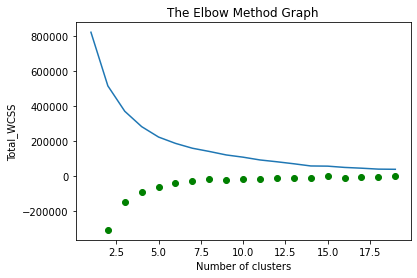

In [92]:
# Метод локтя (elbow)
# визуалицация суммы квадратов расстояний точек от центроида = аттрибут модели kmeans при различных значением кластеров  (синяя линия)
# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 20

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=1 )
    kmeans.fit(df)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),
         total_wcss)
# изобраизим прирост 2-x сумму квадратов расстояний (зеленые точки )

plt.scatter(range(2, len(total_wcss)+1),
         np.diff(total_wcss, 1), c ='g' )

plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()

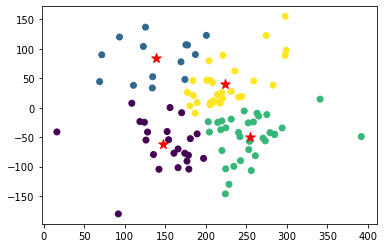

In [93]:
# сделаем визуализацию для центров кластеров для двумерного массива с количесвом центроидов 6
kmeans = KMeans(n_clusters = 4, init ='random', max_iter=300, random_state=1 ).fit(df)
plt.scatter(df['x'], df['y'], c=kmeans.labels_)
plt.scatter([kmeans.cluster_centers_[i][0] for i in range(len(kmeans.cluster_centers_))], 
            [kmeans.cluster_centers_[i][1] for i in range(len(kmeans.cluster_centers_))] , marker='*', s = 100, c ='r')
plt.show()

## Метод k-ближайших соседей

- Метод k-ближайших соседей (англ. k-nearest neighbors algorithm, k-NN) — метрический алгоритм для автоматической классификации объектов или регрессии.
- метод обучения с учителем

[Статья 1](https://medium.com/analytics-vidhya/a-beginners-guide-to-k-nearest-neighbor-knn-algorithm-with-code-5015ce8b227e)

[Статья 2](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

[Статья 3](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)


In [94]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [95]:
# Поскольку алгоритм K-ближайших соседей делает прогнозы относительно точки данных (семпла), используя наиболее близкие к ней наблюдения, 
# существующий масштаб показателей в датасете имеет большое значение.

# Из-за этого специалисты по машинному обучению обычно стандартизируют набор данных, что означает корректировку каждого значения x так, 
# чтобы они находились примерно в одном диапазоне.

from sklearn.preprocessing import StandardScaler
# создадим экземпляр класса StandardScaler
scaler = StandardScaler()
# зафитим (обучить scaler на нашем датасете, используя метод fit)
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))
# теперь мы можем применить метод transform для стандартизации всех признаков, чтобы они имели примерно одинаковый масштаб. 
# Мы сохраним преобразованные семплы в переменной scaled_features
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)
scaled_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [96]:
# Разделение датасета на обучающие и тестовые данные
from sklearn.model_selection import train_test_split
x = scaled_data[['WTT', 'SBI' ]]
y = raw_data['TARGET CLASS']
# нужно запустить функцию train_test_split, где будем использовать test_size 30%
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

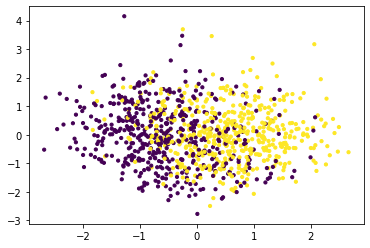

In [97]:
plt.scatter(x['WTT'], x['SBI'], c=y,
            s=10, cmap='viridis');

In [98]:
# Делаем предсказания с помощью алгоритма K-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 46)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

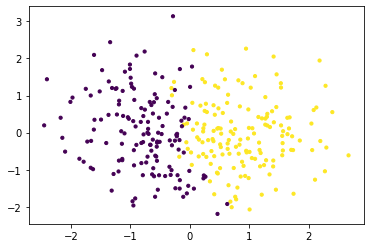

In [99]:
# результаты классификации
plt.scatter(x_test_data['WTT'], x_test_data['SBI'], 
            c =predictions,
            s=10, cmap='viridis');

In [100]:
# Оценка точности нашей модели
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))


              precision    recall  f1-score   support

           0       0.68      0.71      0.70       140
           1       0.74      0.71      0.73       160

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



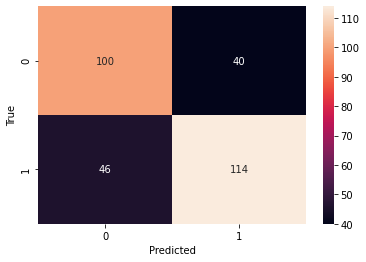

In [101]:
# матрица ошибок
confusion_matrix_tbl = confusion_matrix(y_test_data, predictions)
sns.heatmap(confusion_matrix_tbl, annot=True,  fmt='.4g',)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()

$C_{0, 0}$ - true negatives
$C_{1, 1}$ - true positive
$C_{1, 0}$ - false  negatives
$C_{0, 1}$ - false positive

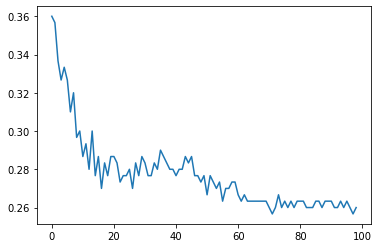

In [102]:
# метода «Локтя
error_rates = []
for i in np.arange(1, 100):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
plt.plot(error_rates)

In [103]:
# подгон гиперпарамера на основе F1-score
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,100):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(x_training_data,y_training_data)
    pred=clf.predict(x_test_data)
    f=f1_score(y_test_data,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

Text(0.5, 0, 'K number')

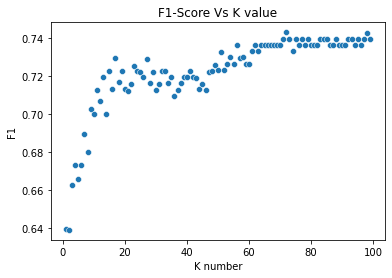

In [104]:
ax =sns.scatterplot(y = f1_list, x = k_list)
ax.set_title('F1-Score Vs K value')
ax.set_ylabel('F1')
ax.set_xlabel('K number')

In [105]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 72  with F1-Score= 0.7429877947017656


<div class="alert alert-warning">
<h2> Как определить оптимальное число кластеров? </h2>

</div>


- Чтобы найти опимальное решение необходимо, чтобы перноначальные позиции центроидов были далеки друг от друга, в противном случае алгоритм застрянет в локальном минимуме 
- повторить кластризацию K-раз: если положения центродов совпадает, то скорее всего это и есть истинное значение цнтроида

Внутригрупповая сумма квадратов — сумма квадратов отклонений каждого наблюдения от центроида кластера.

Общая внутригрупповая сумма квадратов  - сумма внутригрупповых сумм квадратов

In [106]:
import numpy as np

dots = np.array([[-3,3],[1,4],[2,6],[3,8],[5,2],[6,11],[7,1]])
#
center = sum(dots)/ len(dots) #поиск центроида: считается как сумму i-й координаты / кол-во этих координат

squares = (dots - center)**2 #квадараты отклонения от центроида по каждой оси : считается как евклидово расстояние в квадрате

sum_squares = squares.sum() #искомая сумма
sum_squares

146.0

<div class="alert alert-warning">
<h2> Иерархическая кластеризация</h2>

</div>


Идея метода:

1) Рассчитывается расстояние от каждой точки до каждой точки
2) Производится кластеризация методами иереархической кластеризации, например:
    - метод одиночной связи (ближайшего соседа) - Постепенно объеденяет две самые близкие точки в кластер, заменея их центроидом. В первую очередь объединяет самые близкие точки.
   - метод дальнего соседа - в последнюю очередь объединяет самые близкие точки.

Слишком много неразличимых вечток гооврит о том, что в данных нет выделенных кластеров

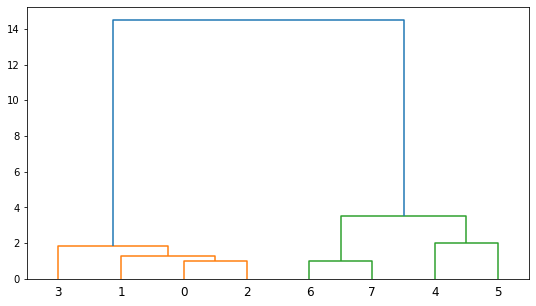

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

# Для прорисовки графики
%matplotlib inline

# Наши данные
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]], dtype=float)

Z = linkage(points, 'ward')
fig = plt.figure(figsize=(9, 5))
dn = dendrogram(Z)

plt.show()

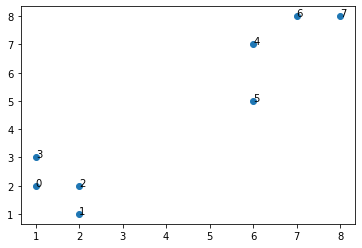

In [108]:
# визуализируем то, как расположены точки в простарансве 
x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]
plt.scatter(x, 
        y)
for i_x, i_y, number in zip(x, y, range(len(x))):
    plt.text(i_x, i_y, '{:.0f}'.format(number))

plt.show()

In [109]:
# найдем расстояния между любыми парами точке 
box = []
for i in range(len(points)):
    for j in range(len(points)):
        distance = (points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2
    
        box.append([i, j ,distance ])
df  = pd.DataFrame(box, columns=['first_point', 'second_point', 'distance'])
df_pivot = df.pivot_table(index = 'first_point', columns = 'second_point', aggfunc={'distance':'sum'}).reset_index(drop=True)['distance']

In [110]:
# дополнительно сделаем маску 
mask = np.zeros_like(df_pivot)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:xlabel='second_point'>

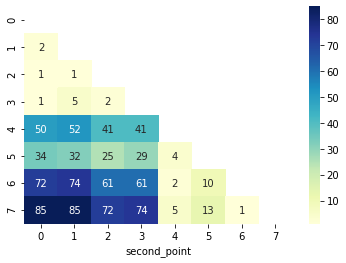

In [111]:
sns.heatmap(df_pivot,
           mask=mask, cmap="YlGnBu", annot=True)

In [112]:
'''
Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным 
числом количественных переменных и число кластеров, которое необходимо
выделить при помощи иерархической кластеризации.
'''

'\nНапишите функцию smart_hclust, которая получает на вход dataframe  с произвольным \nчислом количественных переменных и число кластеров, которое необходимо\nвыделить при помощи иерархической кластеризации.\n'

,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


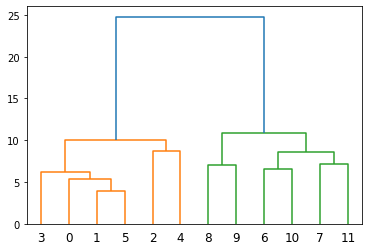

In [113]:

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_hclust.csv')

def smart_hclust(data):
    # Вычисляем матрицу расстояний
    Z = linkage(data, method='average', metric='euclidean')
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z)
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    labels = fcluster(Z, 9.5, criterion='distance')
    data['labels'] = labels
    return data
smart_hclust(data)

In [114]:
'''
Интересной особенностью кластерного анализа является тот факт, что мы получаем только итоговый ответ, 
к какому кластеру принадлежит каждое наблюдение. Однако мы не знаем, по каким переменным различаются
выделенные кластеры. Поэтому, если нас интересует не только сам факт того, что мы смогли выделить кластеры в
наших данных, но мы также хотим понять, чем же они различаются, разумно сравнить кластеры между собой по
имеющимся переменным.

Напишите функцию get_difference, которая получает на вход два аргумента: 

test_data — набор данных с произвольным числом количественных переменных.
n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.
Функция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными
кластерами (p < 0.05)﻿. Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в
исходные данные новую группирующую переменную — номер кластера, и сравниваем получившиеся группы между собой по 
количественным переменным при помощи дисперсионного анализа.
'''

'\nИнтересной особенностью кластерного анализа является тот факт, что мы получаем только итоговый ответ, \nк какому кластеру принадлежит каждое наблюдение. Однако мы не знаем, по каким переменным различаются\nвыделенные кластеры. Поэтому, если нас интересует не только сам факт того, что мы смогли выделить кластеры в\nнаших данных, но мы также хотим понять, чем же они различаются, разумно сравнить кластеры между собой по\nимеющимся переменным.\n\nНапишите функцию get_difference, которая получает на вход два аргумента: \n\ntest_data — набор данных с произвольным числом количественных переменных.\nn_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.\nФункция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными\nкластерами (p < 0.05)\ufeff. Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в\nисходные данные новую группирующую переменную — номер кластера, и сравнивае

In [115]:
data1 = pd.read_csv("https://stepic.org/media/attachments/course/524/cluster_1.csv")
data2 = pd.read_csv("https://stepic.org/media/attachments/course/524/cluster_2.csv")

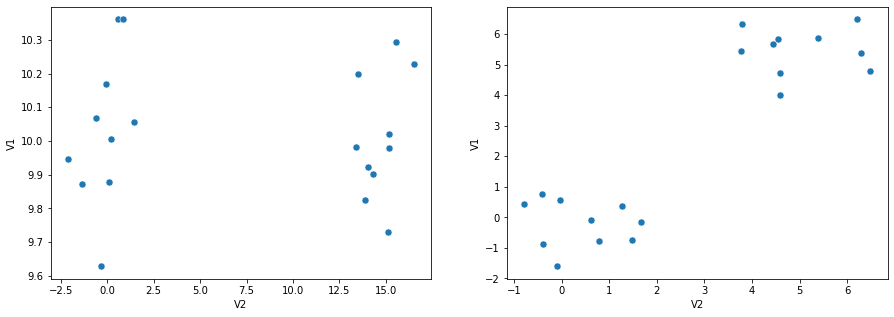

In [116]:
fig, ax = plt.subplots(1, 2, figsize= (15, 5))
for number, i in enumerate([data1, data2]):
    sns.scatterplot(data = i, x= 'V2', y ='V1', s=50, ax =ax[number], palette="deep")

In [117]:
def fitting_cluster(data1, n_cluster):
    Z = linkage(data1, method='average', metric='euclidean')
    # Визуализируем иерархическую кластеризацию
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    
    for boundary in np.arange(1, 40, 0.01):
        labels = fcluster(Z, boundary, criterion='distance')
        if len(set(labels)) == n_cluster:
            break
    data1['labels'] = labels
    return data1

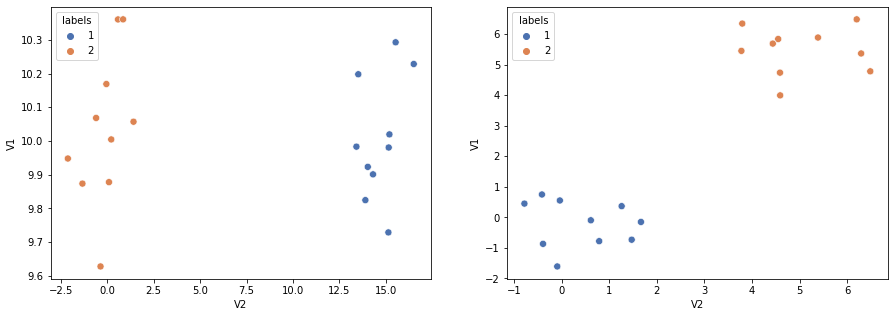

In [118]:
fig, ax = plt.subplots(1, 2, figsize= (15, 5))
for number, i in enumerate([data1, data2]):
    df = fitting_cluster(i, 2)
    sns.scatterplot(data = df, x= 'V2', y ='V1',hue ='labels', s=50, ax =ax[number], palette="deep")
    

<div class="alert alert-warning">
<h2> Метод главных компонент </h2>

</div>


Первоначально: главных компонент сколько же сколько исходных переменных

Задача: нарисовать новые оси, которые лучше описывают наши данные 

Чем сильнее кореляция: тем меньше мы потеряем информации при переходе на новую ось

In [119]:
# pip install pca

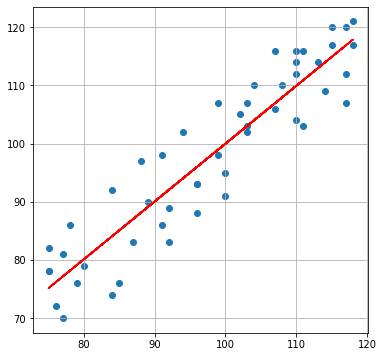

In [120]:
from pca import pca

# генерируем линейную зависимость оценок
R = np.random.randint(75,120,50)
stat = [elem + np.random.randint(-10,10) for elem in R]
X = np.column_stack((R, stat))

x = X[:,0]
y = X[:,1]

# рисуем диаграмму рассеивания 
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# добавляем регрессионную прямую
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.grid()
plt.show()

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


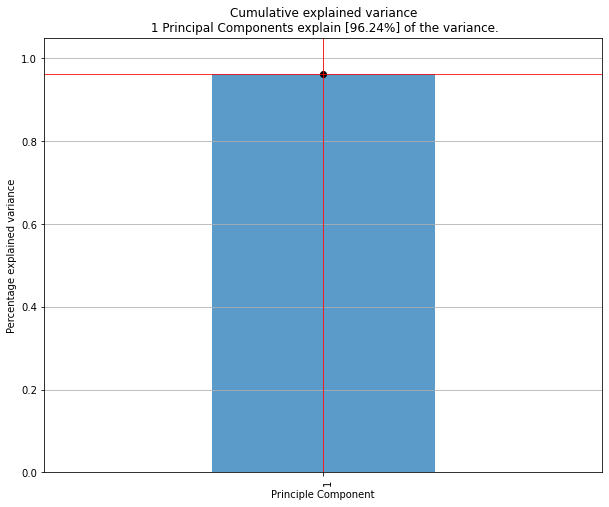

[pca] >Requires 2 PCs to make 2d plot.


<Figure size 432x288 with 0 Axes>

In [121]:
# настраиваем модель с 2-мя компонентами
model = pca(n_components=1)
results = model.fit_transform(X)

# столбчатая диаграмма
fig, ax = model.plot()

# диаграмма рассеивания с новыми координатами
fig, ax = model.biplot(n_feat=10, legend=True)
plt.show()

**Когда применять?** Например при построении регрессии моежт всретиться высокая мультиколинеарность переменных - предикторов, при помощи метода главных компонент можно сократить размерность и использовать только 1 перменную

- Если на графике biplot угол между переменными равен 90 градусов, значит коэффициент корреляции межу ними равняется нулю.

- Число главных компонент всегда равняется исходному числу переменных.

- При помощи графика biplot мы можем выяснить, как взаимосвязаны между собой исходные переменные (положительно или отрицательно)

[Применение метода главных компонент](https://habr.com/ru/post/507618/)

In [122]:
from sklearn.decomposition import PCA

In [123]:
# инициируем модель PCA с 4 компонентами
model_pca = PCA(n_components = 2)
# обучим модель на обучающей выборке
model_pca.fit(X)
Z_train_norm = model_pca.transform(X)

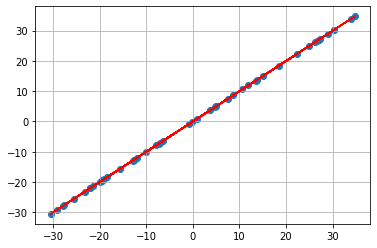

In [124]:
x_pc, y_pc = [Z_train_norm[i][0] for i in range(len(Z_train_norm))], [Z_train_norm[i][0] for i in range(len(Z_train_norm))]
x_pc, y_pc = np.array(x_pc), np.array(y_pc)
plt.scatter(x_pc, y_pc)
b1, b0 = np.polyfit(x_pc, y_pc, 1) #  b0 - intercept, b1 - slope
plt.plot(x_pc, b0 + b1*x_pc, color='red')
plt.grid()
plt.show()

<div class="alert alert-warning">
<h2> факторный анализ </h2>

</div>


Главная цель факторного анализа все-таки нахождение скрытых, латентных переменных и выявление структуры данных. Это помогает в интерпретации данных за счет уменьшения числа переменных.

**Factor Analysis Vs. Principle Component Analysis**
- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.

In [135]:
import os
os.getcwd()

'C:\\Users\\Boyarkin.IS1\\Desktop\\DS\\Private\\education_courses\\Основы Статистики [Карпов]'

In [131]:
# pip install factor-analyzer

In [130]:
from factor_analyzer import FactorAnalyzer

In [176]:
df= pd.read_csv("data//bfi.csv")

In [177]:
# Dropping missing values rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [178]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61623,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,61629,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,61634,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,61640,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,61661,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


In [143]:
# Прежде чем выполнять факторный анализ, вам необходимо оценить “факторизуемость” нашего набора данных. Факторизуемость означает 
# "можем ли мы найти факторы в наборе данных?". Существует два метода проверки факторизуемости или адекватности выборки:

# Тест Бартлетта
# Тест Кайзера-Мейера-Олкина

In [145]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
if p_value > 0.05:
    print('Нельзя использовать факторный анализ')
else:
    print('Можно использовать факторный анализ')

Можно использовать факторный анализ


In [182]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(df)
if kmo_model < 0.6:
    print('Нельзя использовать факторный анализ')
else:
    print('Можно использовать факторный анализ')

Можно использовать факторный анализ


In [183]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.10750785, 2.81317969, 2.20354941, 1.94261472, 1.62168815,
       1.26441252, 1.12318605, 1.0177699 , 0.86519396, 0.80615722,
       0.77272584, 0.74848277, 0.69772758, 0.67597562, 0.65985871,
       0.64254734, 0.62883126, 0.56870612, 0.5544319 , 0.52680286,
       0.51549204, 0.49137009, 0.47480203, 0.43291775, 0.4197635 ,
       0.40421542, 0.38358228, 0.37254119, 0.26396621])

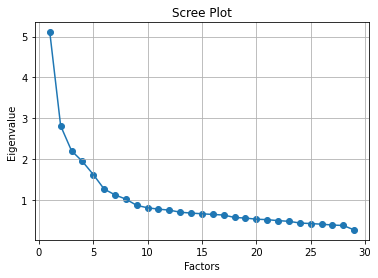

In [184]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [185]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5
0,-0.025042,-0.007362,0.020837,0.022795,0.090878,0.033388
1,0.054301,-0.287366,0.064587,0.019218,-0.005992,0.541320
2,0.055702,0.586358,0.116466,0.017243,-0.095107,-0.312998
3,-0.003684,0.687208,0.093355,0.078808,-0.062403,-0.121955
4,-0.070403,0.475667,0.210000,-0.109309,-0.044361,-0.070918
5,-0.149288,0.648149,0.073942,0.120544,-0.089299,-0.030406
6,0.007312,0.075723,0.536757,0.221296,0.048201,0.002327
7,0.077770,0.159610,0.642352,0.115341,0.132290,0.057586
8,-0.036262,0.125889,0.543888,0.001493,0.029037,-0.031925
9,0.210513,0.007667,-0.654682,-0.055617,0.153550,0.236015


In [186]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.76092735, 2.69866427, 2.04558197, 1.77459464, 1.32768735,
        0.91190405]),
 array([0.09520439, 0.09305739, 0.07053731, 0.06119292, 0.04578232,
        0.03144497]),
 array([0.09520439, 0.18826178, 0.25879909, 0.31999201, 0.36577433,
        0.3972193 ]))

<div class="alert alert-warning">
<h2> Дискриминантный анализ </h2>

</div>


In [ ]:
[]